In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import seaborn as sns

In [3]:
df = pd.read_csv("pgaTourData.csv")
df1 = pd.read_csv("f1.csv")
print(df1)
plt.rcParams["figure.figsize"] = (15, 10)

     raceId  grid  positionOrder
0       926    11             13
1       927     6              7
2       928    13             17
3       929    15             18
4       930     6             11
..      ...   ...            ...
115    1044     2              6
116    1045     3              2
117    1046     3             19
118    1047     1              1
119    1052     1              2

[120 rows x 3 columns]


Context: Plotting data using the strategy


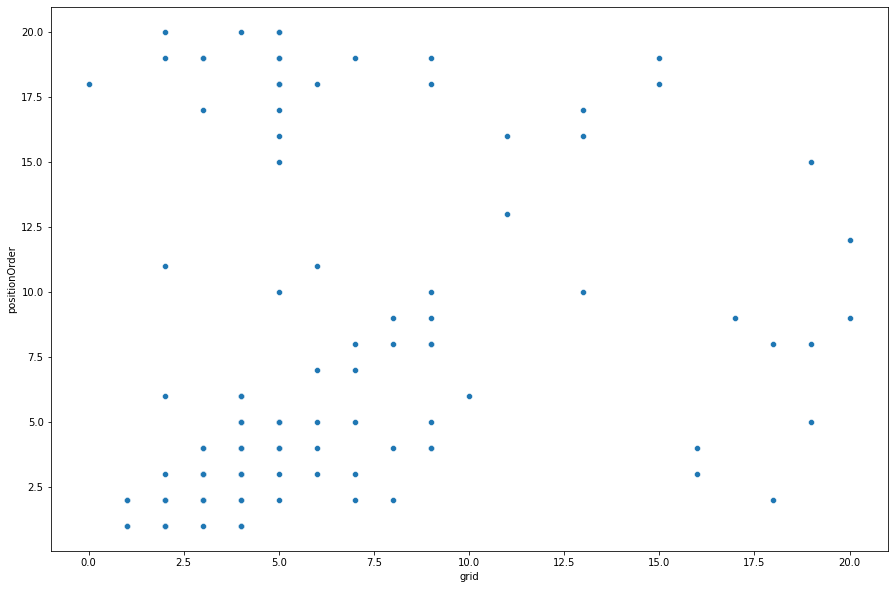

In [9]:
import seaborn as sns


class PlotStrategy():
    def plot(self, col1, col2, df, h):
        pass


class Context():
    def __init__(self, strategy: PlotStrategy, df):
        self._strategy = strategy
        self._df = df

    def getStrategy(self):
        return self._strategy

    def setStrategy(self, strategy):
        self._strategy = strategy

    def getDataFrame(self):
        return self._df

    def setDataFrame(self, df):
        self._df = df

    def plot(self, col1, col2, h = None):
        print("Context: Plotting data using the strategy")
        self._strategy.plot(col1, col2, self.getDataFrame(), h)

    # Manipulate dataset functions

    def filterByRows(self, column, values):
        self.setDataFrame(
            self.getDataFrame().loc[self.getDataFrame()[column].isin(values)])

    def sortByColumn(self, column, a):
        self.setDataFrame(self.getDataFrame().sort_values(
            by=[column], ascending=a))

    def removeCharFromColumn(self, char, column):
        self.getDataFrame()[column] = self.getDataFrame()[
            column].str.replace(char, '')

    def convertToFloat(self, column):
        self.getDataFrame()[column] = self.getDataFrame()[column].astype(float)

    def aggregate(self, group, ag_func):
        newDf = self.getDataFrame().groupby(
            self.getDataFrame()[group]).aggregate(ag_func)
        self.setDataFrame(newDf)

    def headN(self, N):
        self.setDataFrame(self.getDataFrame().head(N))


class ScatterStrategy(PlotStrategy):
    def plot(self, col1, col2, df, h):
        return sns.scatterplot(x=col1, y=col2, data=df, hue=h, size=h, sizes=(30, 200))
    #fit_reg=True, scatter_kws={"s": 10}, line_kws={'color': 'red'}, 


class LineStrategy(PlotStrategy):
    def plot(self, col1, col2, df, h):
        return sns.lineplot(x=col1, y=col2, data=df, hue=h)


class BarStrategy(PlotStrategy):
    def plot(self, col1, col2, df, h):
        return sns.catplot(data=df, kind="bar", x=col1, y=col2, hue=h)


if __name__ == "__main__":

    #pga = Context(ScatterStrategy(), df)
    f1 = Context(ScatterStrategy(), df1)
    #pga.removeCharFromColumn(',', "Money")
    #pga.removeCharFromColumn('$', "Money")
    #pga.convertToFloat("Money")
    #pga.removeCharFromColumn(',', "Points")
    #pga.convertToFloat("Points")
    #pga.plot("SG:APR", "Money")
    f1.plot("grid", "positionOrder")
    
